<a href="https://colab.research.google.com/github/its-rahul-cloud/Travellers/blob/master/hotel_max_booking_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install kaggle

! kaggle competitions download jessemostipak/hotel-booking-demand


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
403 - Forbidden


In [4]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
!unzip archive*


Archive:  archive (3).zip
  inflating: hotel_bookings.csv      


In [15]:
!ls


'archive (3).zip'   hotel_bookings.csv	 kaggle.json   sample_data


In [16]:
# Importing libraries and adjusting plotting settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [18]:
df= pd.read_csv('/content/hotel_bookings.csv')

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
df.shape

(119390, 32)

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [23]:
df.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Number of missings in children = 4
Number of missings in country = 488
Number of missings in agent = 16340
Number of missings in company = 112593


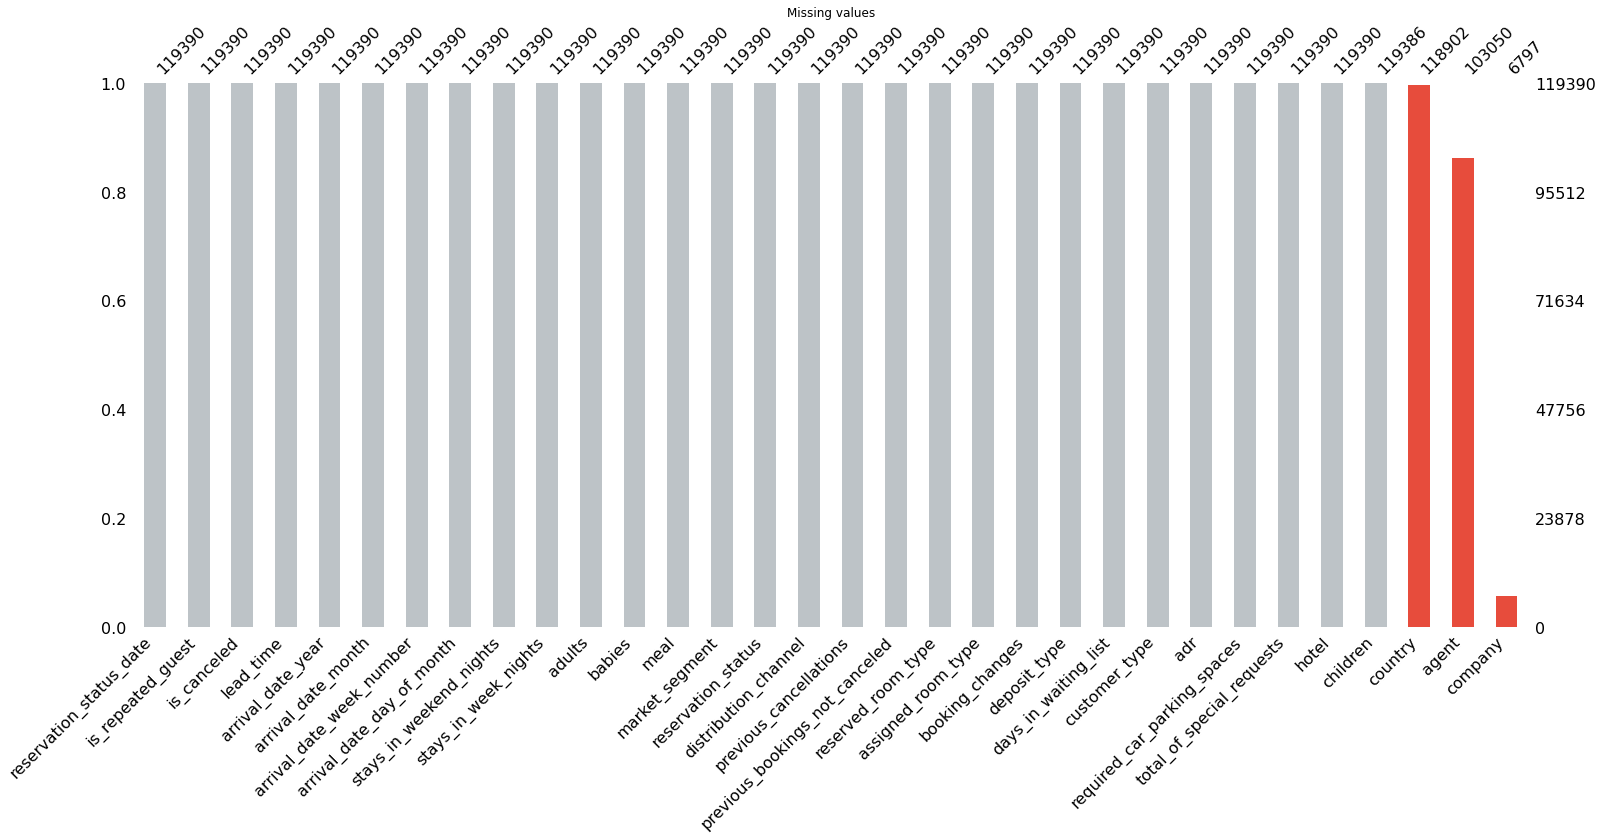

In [24]:
  for i in df:
    nulls = df[i].isnull().sum()
    if nulls>0:
        print(f"Number of missings in {i} = {nulls}")
fig, ax = plt.subplots(figsize = (12,8))
colors = ['#bdc3c7']*29 +['#e74c3c']*3
msno.bar(df, sort='descending',color=colors)
ax.set_title('Missing values')
fig.show()

In [25]:
df.drop('company',axis=1,inplace=True)
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02


# EDA
top 10 countries guests comes from

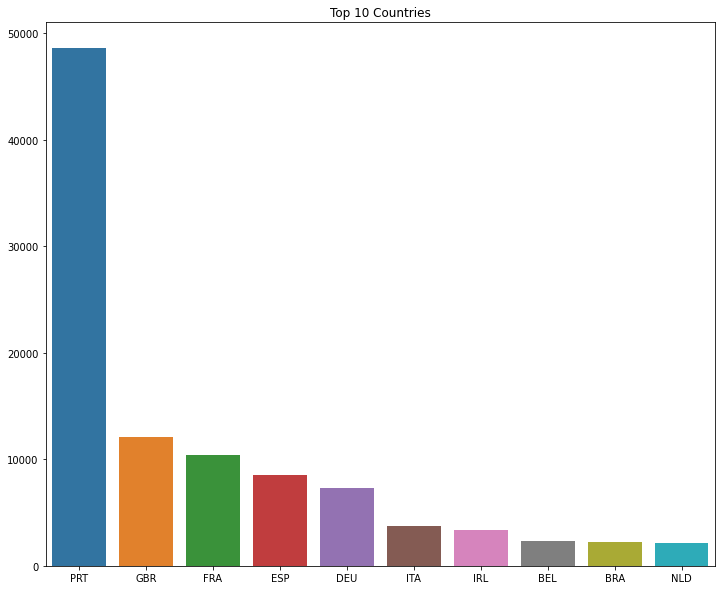

In [26]:
# from dataprep.clean import clean_country
fig, ax = plt.subplots(figsize = (12,10))
ax.set_title('Top 10 Countries')
fig.show()
top_ten = df.country.value_counts()[0:10]
# cleaned = clean_country(top_ten.reset_index(),'index')[['country','index_clean']]
sns.barplot(x=top_ten.index, y=top_ten.values)

In [27]:
import folium
from folium.plugins import HeatMap
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'],
                 color_continuous_scale=px.colors.sequential.speed )
guests_map.show()

In [28]:
df_plot = df.copy()
df_plot['arrival_date'] = df_plot['arrival_date_day_of_month'].astype(str) + ' '+ df_plot['arrival_date_month']+ ', '+ df_plot['arrival_date_year'].astype(str) 
df_plot['arrival_date'] = pd.to_datetime(df_plot['arrival_date'])
df_plot['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

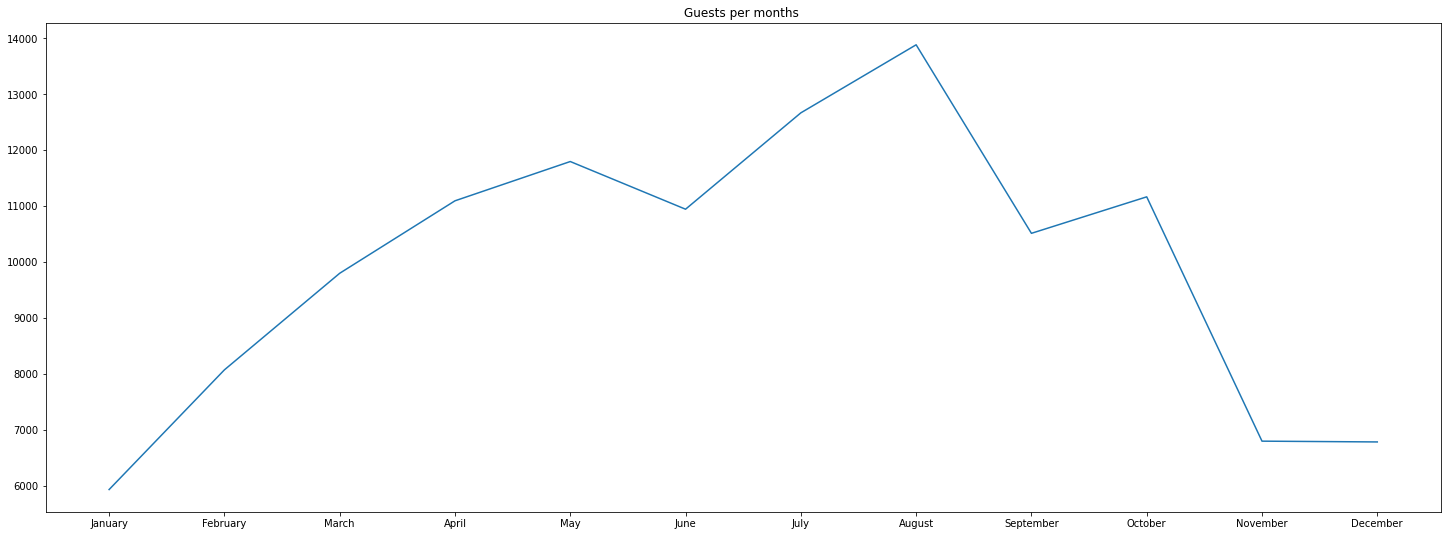

In [29]:
fig, ax = plt.subplots(figsize = (25,9))
ax.set_title('Guests per months ')
arrive = df_plot.groupby('arrival_date')[['hotel']].count()
arrive['month_name'] = arrive.index.month_name()
show_month = arrive.groupby('month_name').sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
show_month = show_month.reindex(new_order, axis=0)
plt.plot(show_month)
plt.show()

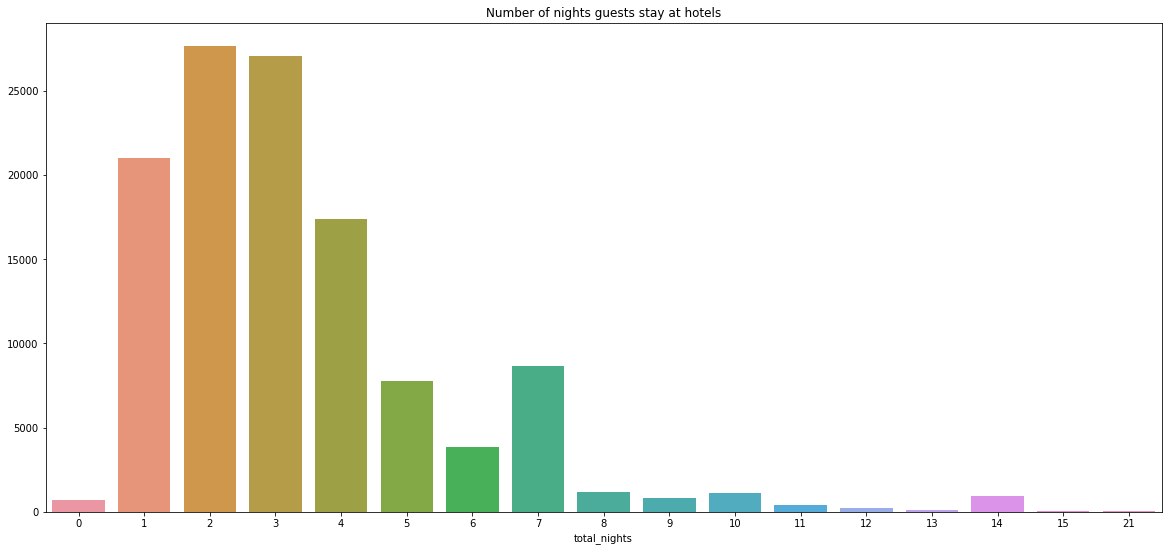

In [30]:
fig, ax = plt.subplots(figsize = (20,9))
ax.set_title('Number of nights guests stay at hotels')
df_plot['total_nights'] = df_plot["stays_in_weekend_nights"] + df_plot["stays_in_week_nights"]
df_tot = df_plot.groupby('total_nights').count()
df_tot = df_tot[df_tot['hotel']>50]['hotel']
sns.barplot(x=df_tot.index, y=df_tot.values)
plt.show()

Preprocessing 

In [31]:
df_cat = df.select_dtypes('object')
df_cat.head(4)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02


In [32]:
df_num = df.select_dtypes(exclude='object')
df_num.head(4)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0


# Decomposing reservation date column

In [33]:
df_cat.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [35]:
  df_cat.head(4)

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out


# Ecoding 
using label encoding

In [36]:
for col in df_cat.iloc[:]:
    le = preprocessing.LabelEncoder()
    df_cat[col] = le.fit_transform(df[col])

In [37]:
df_cat.head(4)

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,1,0,135,3,1,2,2,0,2,1
1,1,0,135,3,1,2,2,0,2,1
2,1,0,59,3,1,0,2,0,2,1
3,1,0,59,2,0,0,0,0,2,1


# Filling missing value

In [38]:
df_num.isnull().sum()

is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
agent                             16340
days_in_waiting_list                  0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
dtype: int64

In [39]:
df_num['agent'] = df_num['agent'].fillna(value = df_num['agent'].median())
df_num = df_num.replace(np.nan, 0)
df_num[['children','agent']].isnull().sum()

children    0
agent       0
dtype: int64

In [40]:

y = df_num['is_canceled']
df_num.drop('is_canceled',axis=1, inplace=True)

In [41]:
std_scaler = preprocessing.StandardScaler()
def standardization(df):
    for i in df:
        arr = np.array(df[i])
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [42]:
df_num = standardization(df_num)
df_num.head(4)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,2.227051,-1.634768,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.592464,-0.131924,-2.015038,-0.254873,-0.720694
1,5.923385,-1.634768,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.592464,-0.131924,-2.015038,-0.254873,-0.720694
2,-0.907814,-1.634768,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.592464,-0.131924,-0.530935,-0.254873,-0.720694
3,-0.851667,-1.634768,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.145860,-0.131924,-0.530935,-0.254873,-0.720694


In [43]:
X = pd.concat([df_num, df_cat],axis=1)

# Split data into train , validate and test


In [44]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.30)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.25)


In [45]:
print(f"X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
print(f"X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

X_train shape = (83573, 28), y_train shape = (83573,)
X_val shape = (26862, 28), y_val shape = (26862,)
X_test shape = (8955, 28), y_test shape = (8955,)


# Modeling

In [47]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_his(history):
    plt.figure(figsize=(15,12))
    metrics = ['accuracy', 'loss']
    for i, metric in enumerate(metrics):
        plt.subplot(220+1+i)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
    plt.show()

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal, GlorotNormal

def create_baseline():
    model = Sequential([
        Dense(64, activation = 'relu', input_shape=[X_train.shape[-1]], kernel_initializer=HeNormal()),
        BatchNormalization(),

        Dense(128, activation = 'relu', kernel_initializer=HeNormal()),
        BatchNormalization(),

        Dense(256, activation = 'relu', kernel_initializer=HeNormal()),
        BatchNormalization(),

        Dense(128, activation = 'relu', kernel_initializer=HeNormal()),
        BatchNormalization(),

        Dense(64, activation = 'relu', kernel_initializer=HeNormal()),
        Dropout(0.2),

        Dense(1, activation="sigmoid", kernel_initializer=GlorotNormal()),
    ])
        
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [49]:
model = create_baseline()

In [52]:
from keras import callbacks 
early_stop = callbacks.EarlyStopping(
        monitor="val_accuracy", 
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True, 
     )

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = 512,
    epochs = 60,

    callbacks=[early_stop],
)

Epoch 1/60
164/164 [==============================] - 6s 22ms/step - loss: 0.1987 - accuracy: 0.9242 - val_loss: 1.1370 - val_accuracy: 0.7264
Epoch 2/60
164/164 [==============================] - 3s 19ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0917 - val_accuracy: 0.9599
Epoch 3/60
164/164 [==============================] - 3s 20ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.0039 - val_accuracy: 0.9985
Epoch 4/60
164/164 [==============================] - 3s 20ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0381 - val_accuracy: 0.9846
Epoch 5/60
164/164 [==============================] - 4s 26ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0034 - val_accuracy: 0.9988
Epoch 6/60
164/164 [==============================] - 3s 21ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0106 - val_accuracy: 0.9961
Epoch 7/60
164/164 [==============================] - 3s 20ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9989

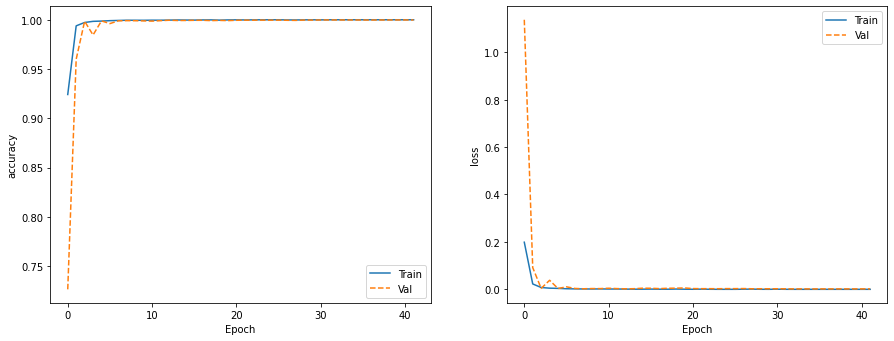

In [53]:
plot_his(history)

# Evaluate test set

In [54]:

y_pred = np.round(model.predict(X_test)).astype('int')


280/280 [==============================] - 1s 2ms/step


In [55]:
class_names = ['Not Leaving', 'Leaving']
print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

 Not Leaving       1.00      1.00      1.00      5626
     Leaving       1.00      1.00      1.00      3329

    accuracy                           1.00      8955
   macro avg       1.00      1.00      1.00      8955
weighted avg       1.00      1.00      1.00      8955



Text(0.5, 1.0, 'Confusion Matrix')

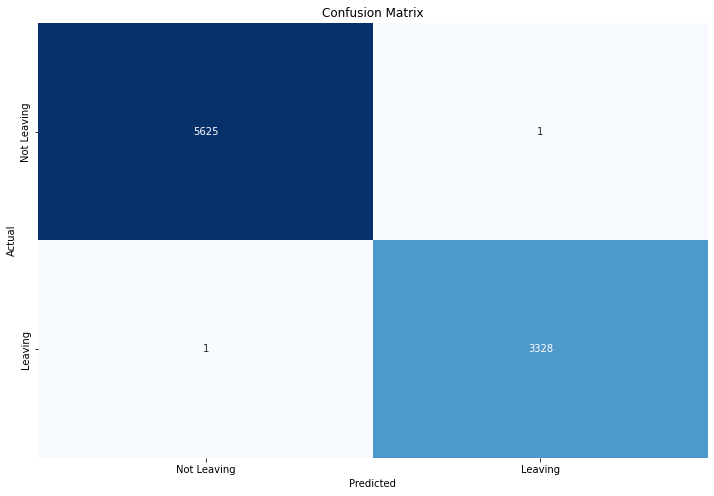

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(2)+.5, class_names)
plt.yticks(np.arange(2)+.5, class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")